In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()

In [3]:
sd = dt.datetime(2008,1,1)
ed = dt.datetime(2009,12,31)

In [5]:
df_price = pd.read_csv('./data/JPM.csv', index_col='Date',parse_dates=True,
                   na_values=['nan'],usecols=['Date','Adj Close'])

df_price = df_price.sort_index()

#aapl = aapl.rename(columns={'Adj Close':'AAPL'})

df_price = df_price[sd:ed]

df_price

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


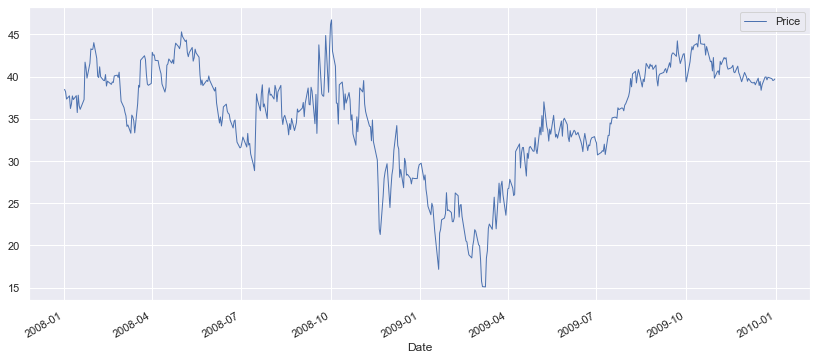

In [6]:
df_price['Adj Close'].plot(figsize=(14,6),lw=1,label='Price')
plt.legend()

In [41]:
def BB(data, period=20,column='Adj Close'):
    data['RollingMean'] = data[column].rolling(window=period).mean()
    data['RollingStd'] = data[column].rolling(window=period).std()
    data['UpperBand'] = data['RollingMean'] + (data['RollingStd'] * 2)
    data['LowerBand'] = data['RollingMean'] - (data['RollingStd'] * 2)
    data['BBBand'] = (data[column] - data['RollingMean']) / (2 * data[column].std())
    data['bolinger %b']=(data[column]-data['LowerBand'])/(data['UpperBand']-data['LowerBand'])
    return data

In [42]:
data = df_price.copy()
period =20
column='Adj Close'

In [43]:
data = BB(df_price.copy(), period=20, column=column)

In [44]:
data

,Adj Close,RollingMean,RollingStd,UpperBand,LowerBand,BBBand,bolinger %b
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,38.20,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,37.33,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,37.71,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,36.21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009-12-24,39.91,39.5145,0.497472,40.509445,38.519555,0.030789,0.698755
2009-12-28,39.75,39.5330,0.499084,40.531169,38.534831,0.016893,0.608699
2009-12-29,39.53,39.4855,0.446666,40.378831,38.592169,0.003464,0.524907


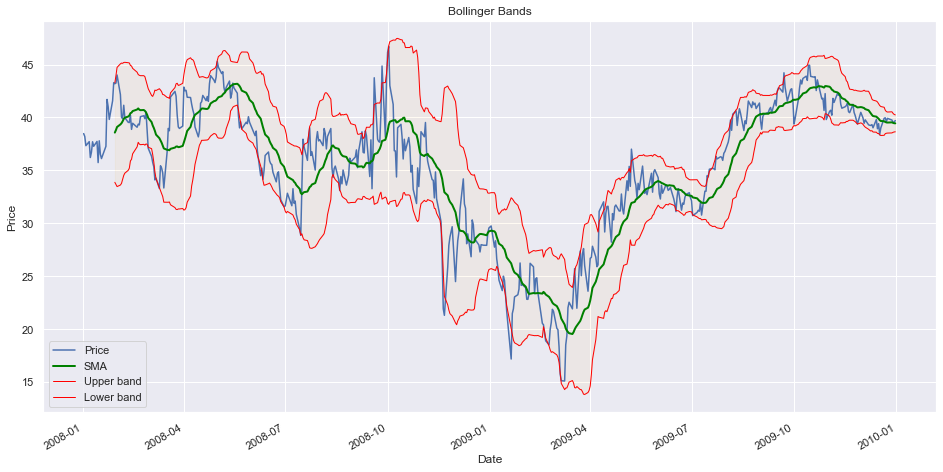

In [47]:

# Get index values for the X axis for facebook DataFrame
#x_axis = fb.index.get_level_values(0)

ax = data[column].plot(figsize=(16,8),lw=1.5,label='Price',title='Bollinger Bands')

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='orange', alpha=0.05)

data['RollingMean'].plot(label="SMA", lw=2, ax=ax,color='green')
data['UpperBand'].plot ( label="Upper band", ax=ax, color='red' , lw=1)
data['LowerBand'].plot ( label="Lower band", ax=ax, color='red' ,lw=1 )
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc=0)

In [63]:
data['max'] = data[column].rolling(window=period).max()
data['min'] = data[column].rolling(window=period).min()
data['bolinger %b']=(data['Adj Close']-data['min'])/(data['max']-data['min'])
#data['bolinger %b']=25.01

In [64]:
data[['max','min','Adj Close','bolinger %b']].tail(20)

,max,min,Adj Close,bolinger %b
Date,,,,
2009-12-03,42.25,39.38,39.44,0.020906
2009-12-04,42.25,39.38,39.77,0.135889
2009-12-07,42.25,39.30,39.30,0.000000
2009-12-08,42.23,39.26,39.26,0.000000
2009-12-09,42.23,39.24,39.24,0.000000
2009-12-10,41.33,39.24,39.32,0.038278
2009-12-11,41.33,39.02,39.02,0.000000
2009-12-14,41.33,39.02,39.80,0.337662
2009-12-15,41.33,38.93,38.93,0.000000


In [55]:
39.44-39.38/(42.25-39.38)

25.718745644599288

In [213]:
data = df_price.copy()
period =20
column='Adj Close'

In [214]:
data = BB(df_price.copy(), period=20, column=column)

In [215]:
data

,Adj Close,RollingMean,RollingStd,UpperBand,LowerBand,BBBand,bolinger %b
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,38.20,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,37.33,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,37.71,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,36.21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009-12-24,39.91,39.5145,0.497472,40.509445,38.519555,0.030789,0.698755
2009-12-28,39.75,39.5330,0.499084,40.531169,38.534831,0.016893,0.608699
2009-12-29,39.53,39.4855,0.446666,40.378831,38.592169,0.003464,0.524907


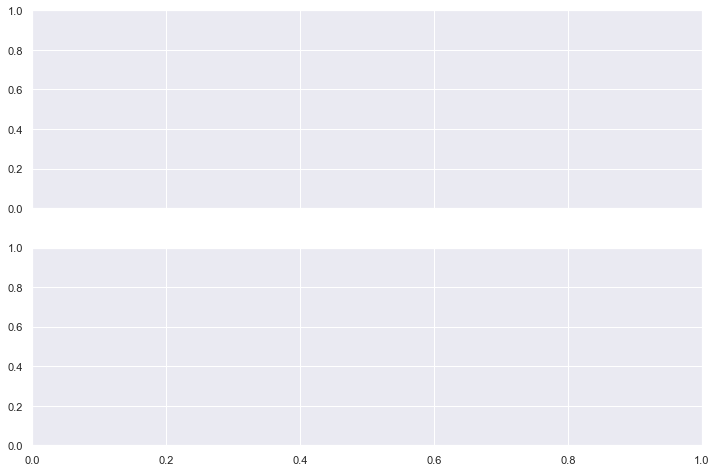

In [66]:
fig,(ax3,ax4) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)

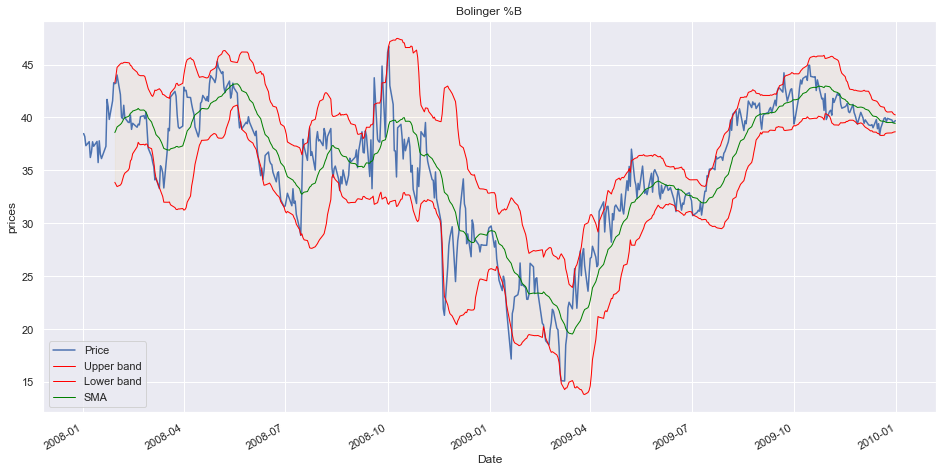

In [76]:
ax3 = data[column].plot(figsize=(16,8),lw=1.5,label='Price',title='Bollinger Bands')
ax3.plot(data['UpperBand'],label="Upper band", color='red',lw=1 )
ax3.plot(data['LowerBand'],label="Lower band", color='red',lw=1 )
ax3.plot(data['RollingMean'],label="SMA", color='green',lw=1 )
ax3.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='orange', alpha=0.05)
ax3.set_ylabel("prices")
ax3.set_title("Bolinger %B")
ax3.legend(loc=0)

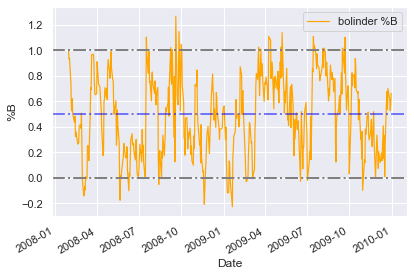

In [75]:
#ax4 = data[column].plot(figsize=(16,8),lw=1.5,label='Price',title='Bollinger Bands')

ax4 = data['bolinger %b'].plot(lw=1.2,label='bolinder %B', color='orange', ls='-')
#ax4.plot(data['bolinger %b'],lw=1.2,label='bolinder %B', color='orange', ls='-')

# overbought
ax4.axhline(1, color='gray', linewidth=2, linestyle='-.' )
# oversold
ax4.axhline(0, color='gray', linewidth=2, linestyle='-.' )
# 50% retrace
ax4.axhline(.5, color='blue', linewidth=2, linestyle='-.', alpha=0.5 )

ax3.fill_between(data.index, data['UpperBand'], 1, color='red', alpha=1)


ax4.set_xlabel("Date")
ax4.set_ylabel("%B")
ax4.legend(loc=0)

plt.tight_layout()

In [216]:
data

,Adj Close,RollingMean,RollingStd,UpperBand,LowerBand,BBBand,bolinger %b
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,38.20,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,37.33,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,37.71,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,36.21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009-12-24,39.91,39.5145,0.497472,40.509445,38.519555,0.030789,0.698755
2009-12-28,39.75,39.5330,0.499084,40.531169,38.534831,0.016893,0.608699
2009-12-29,39.53,39.4855,0.446666,40.378831,38.592169,0.003464,0.524907


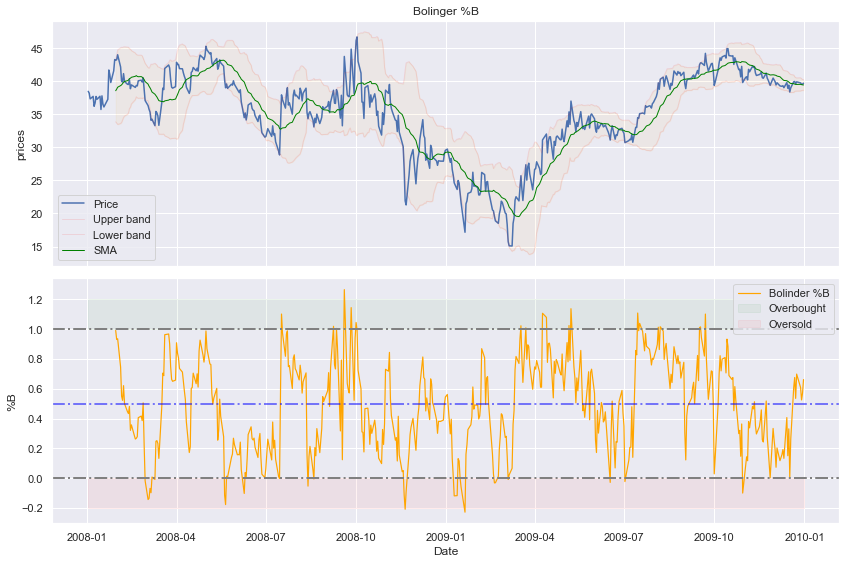

In [231]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
#ax1 = data[column].plot(figsize=(16,8),lw=1.5,label='Price',title='Bollinger Bands')
ax1.plot(data[column],lw=1.5,label='Price')
ax1.plot(data['UpperBand'],label="Upper band", color='red',lw=1,alpha=0.1)
ax1.plot(data['LowerBand'],label="Lower band", color='red',lw=1,alpha=0.1 )
ax1.plot(data['RollingMean'],label="SMA", color='green',lw=1 )
ax1.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='orange', alpha=0.05)
ax1.set_ylabel("prices")
ax1.set_title("Bolinger %B")
ax1.legend(loc=0)


#ax4 = data['bolinger %b'].plot(figsize=(16,8),lw=1.2,label='bolinder %B', color='orange', ls='-')
ax2.plot(data['bolinger %b'],lw=1.2,label='Bolinder %B', color='orange', ls='-')

# overbought
ax2.axhline(1, color='gray', linewidth=2, linestyle='-.' )
# oversold
ax2.axhline(0, color='gray', linewidth=2, linestyle='-.' )
# 50% retrace
ax2.axhline(.5, color='blue', linewidth=2, linestyle='-.', alpha=0.5 )

ax2.fill_between(data.index, 1.2, 1, color='green', alpha=0.05, label="Overbought")
ax2.fill_between(data.index, -0.2,0, color='red', alpha=0.05, label="Oversold")

ax2.set_xlabel("Date")
ax2.set_ylabel("%B")
ax2.legend(loc=0)

plt.tight_layout()

In [81]:
def RSI(series, n=14):
    # Get the difference in price from previous price
    series = series.copy().diff()

    # Get upwards and downwards gains
    up, down = series.copy(), series.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the exponential weighted values
    roll_up1 = up.ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()
    roll_down1 = down.abs().ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    return(RSI1)

In [82]:
data_df = df_price.copy()
period =20
column='Adj Close'

In [83]:
data_df

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [208]:
data_df['RSI'] = RSI(data_df[column], n=period)

In [209]:
data_df

,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


No handles with labels found to put in legend.


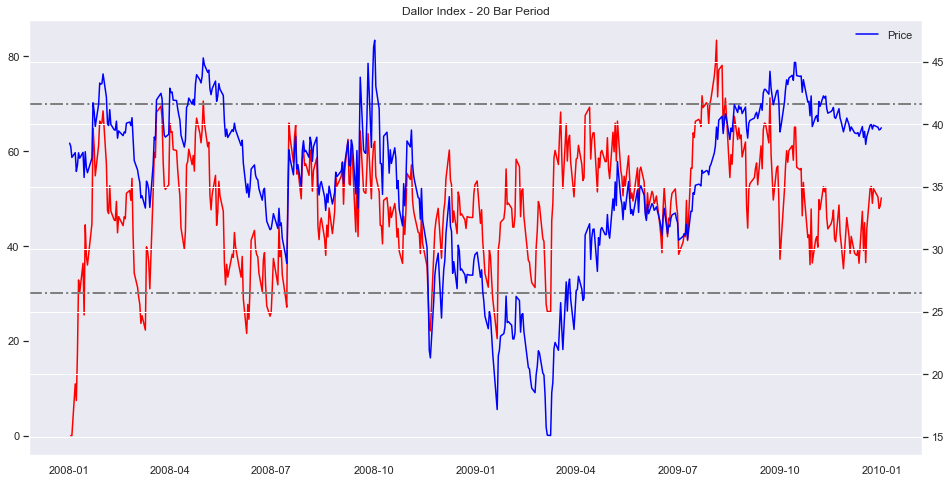

In [99]:
fig, ax = plt.subplots(figsize=(16, 8))
#plt.plot(data_df['Date'], data_df['RSI'], color='red')
plt.plot(data_df.index, data_df['RSI'], color='red')
plt.title('RSI Index - ' + str(period) + ' Bar Period')
plt.grid()
ax.legend(loc=0, frameon=False)

# overbought
plt.axhline(70, color='gray', linewidth=2, linestyle='-.' )
# oversold
plt.axhline(30, color='gray', linewidth=2, linestyle='-.' )

# Get second axis
ax2 = ax.twinx()
plt.plot(data_df.index,  data_df['Adj Close'], label='Price',color='blue')
ax2.legend(loc=0, frameon=False)

In [210]:
data = data_df.copy()

In [89]:
data

,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


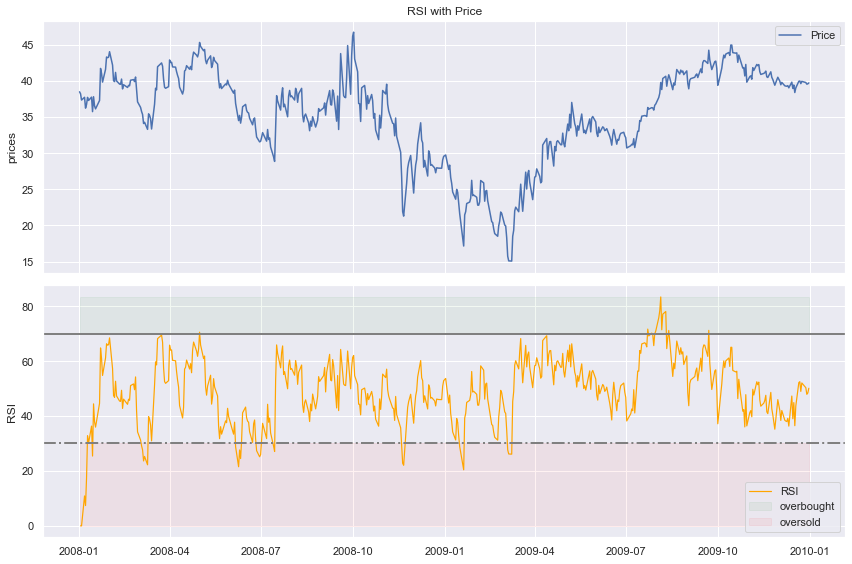

In [211]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
ax1.plot(data['Adj Close'],label='Price')

#ax1.plot(data['UpperBand'],label="upper_band", color='red' )
#ax1.plot(data['LowerBand'],label="lower_band", color='red' )

ax1.set_ylabel("prices")
ax1.set_title("RSI with Price")

ax2.plot(data['RSI'],lw=1.2,label='RSI', color='orange')

# overbought
ax2.axhline(70, color='gray', linewidth=2, linestyle='-' )
# oversold
ax2.axhline(30, color='gray', linewidth=2, linestyle='-.' )


ax2.fill_between(data.index, data['RSI'].max(), 70, color='green', alpha=.05,label='overbought')
ax2.fill_between(data.index, data['RSI'].min(), 30, color='red', alpha=.05,label='oversold')

ax2.set_ylabel("RSI")
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.tight_layout()

In [236]:
def ema(data, period=0, column='Adj Close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    
    return data

In [237]:
def macd(data, period_long=26, period_short=12, period_signal=9, column='Adj Close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

In [106]:
data


,Adj Close,RSI
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,0.000000
2008-01-04,37.33,0.000000
2008-01-07,37.71,10.894942
2008-01-08,36.21,7.384732
...,...,...
2009-12-24,39.91,52.038898
2009-12-28,39.75,50.306283
2009-12-29,39.53,47.883426


In [289]:
data = df_price.copy()
period =20
column='Adj Close'

In [290]:
data

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [238]:
mcad_df = macd(data=data,column=column)

In [119]:
mcad_df

,Adj Close,macd_val,macd_signal_line
Date,,,
2008-01-02,38.47,NaN,NaN
2008-01-03,38.20,NaN,NaN
2008-01-04,37.33,NaN,NaN
2008-01-07,37.71,NaN,NaN
2008-01-08,36.21,NaN,NaN
...,...,...,...
2009-12-24,39.91,-0.437827,-0.273581
2009-12-28,39.75,-0.425814,-0.288805
2009-12-29,39.53,-0.422697,-0.302194


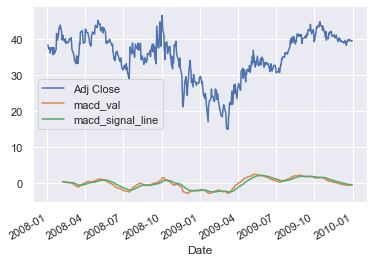

In [120]:
mcad_df.plot()

In [143]:
data['match'] = data.apply(lambda x: x.macd_val if (x.macd_val == x.macd_signal_line) else False, axis=1)

In [ ]:
data['match'] = data.apply(lambda x: TRUe if (x.macd_val == x.macd_signal_line) else False, axis=1)

In [244]:
df_volume = pd.read_csv('./data/JPM.csv', index_col='Date',parse_dates=True,
                   na_values=['nan'],usecols=['Date','Volume'])

df_volume = df_volume.sort_index()

#aapl = aapl.rename(columns={'Adj Close':'AAPL'})

df_volume = df_volume[sd:ed]

df_volume

,Volume
Date,
2008-01-02,22122300
2008-01-03,17150700
2008-01-04,25873800
2008-01-07,25644100
2008-01-08,33646000
...,...
2009-12-24,7956500
2009-12-28,13039900
2009-12-29,15593000


In [242]:
df_volume

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [287]:
data['zero']=0
data

,Adj Close,ema26,ema12,macd_val,macd_signal_line,zero
Date,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,0
2008-01-03,38.20,NaN,NaN,NaN,NaN,0
2008-01-04,37.33,NaN,NaN,NaN,NaN,0
2008-01-07,37.71,NaN,NaN,NaN,NaN,0
2008-01-08,36.21,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2009-12-24,39.91,40.293181,39.855354,-0.437827,-0.273581,0
2009-12-28,39.75,40.273063,39.847250,-0.425814,-0.288805,0
2009-12-29,39.53,40.245542,39.822846,-0.422697,-0.302194,0


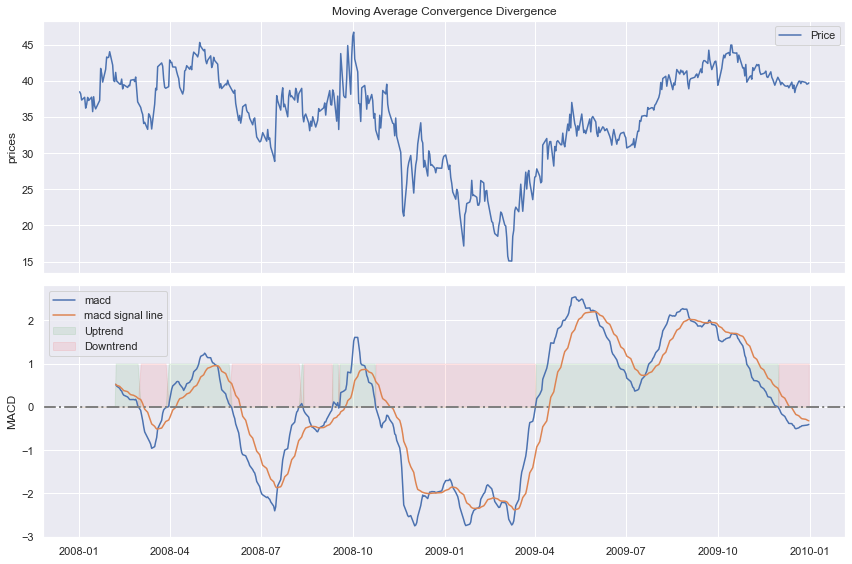

In [286]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1, sharex=True)
ax1.plot(data[column],label='Price')
ax1.set_ylabel("prices")
ax1.set_title("Moving Average Convergence Divergence")

ax2.plot(data['macd_val'],label='macd')
ax2.plot(data['macd_signal_line'],label='macd signal line')
ax2.axhline(0, color='gray', linewidth=2, linestyle='-.' )

#ax3.plot(df_volume['Volume'],label='Volume',color='orange')

#ax2.plot(data['match'],label='cross', color='red')

ax2.fill_between(data.index, data['macd_val']>0, 0, color='green', alpha=0.08,label='Uptrend')
ax2.fill_between(data.index, data['macd_val']<0, 0, color='red', alpha=.08,label='Downtrend')



ax2.set_ylabel("MACD")
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.tight_layout()

In [137]:
#data['cross'] = data[data['macd_val']==data['macd_signal_line']]
data['match'] = data.apply(lambda x: x.macd_val if (x.macd_val == x.macd_signal_line) else 0, axis=1)


In [138]:
data

,Adj Close,ema26,ema12,macd_val,macd_signal_line,c,match
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-03,38.20,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-04,37.33,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-07,37.71,NaN,NaN,NaN,NaN,0.0,0.0
2008-01-08,36.21,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
2009-12-24,39.91,40.293181,39.855354,-0.437827,-0.273581,0.0,0.0
2009-12-28,39.75,40.273063,39.847250,-0.425814,-0.288805,0.0,0.0
2009-12-29,39.53,40.245542,39.822846,-0.422697,-0.302194,0.0,0.0


In [174]:
data = df_price.copy()
period =20
column='Adj Close'


In [175]:
data

,Adj Close
Date,
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21
...,...
2009-12-24,39.91
2009-12-28,39.75
2009-12-29,39.53


In [176]:
data = ema(df_price.copy(),period=20,column=column)

In [177]:
data

,Adj Close,ema20
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,NaN
2008-01-04,37.33,NaN
2008-01-07,37.71,NaN
2008-01-08,36.21,NaN
...,...,...
2009-12-24,39.91,40.202547
2009-12-28,39.75,40.180997
2009-12-29,39.53,40.149997


In [178]:
data.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [179]:
data.loc[data.index]

,Adj Close,ema20
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,NaN
2008-01-04,37.33,NaN
2008-01-07,37.71,NaN
2008-01-08,36.21,NaN
...,...,...
2009-12-24,39.91,40.202547
2009-12-28,39.75,40.180997
2009-12-29,39.53,40.149997


In [180]:
def MOMENTUM(data, period=14, column='Adj Close'):
    
    print(data)
    data['momentum'] = 0.
    
    for index,row in data.iterrows():
        if index >= period:
            prev_close = data.at[index-period, column]
            val_perc = (row[column] - prev_close)/prev_close

            #data.set_value(index, 'momentum', val_perc)
            
            data['momentum'] = val_perc

    return data

In [181]:
data

,Adj Close,ema20
Date,,
2008-01-02,38.47,NaN
2008-01-03,38.20,NaN
2008-01-04,37.33,NaN
2008-01-07,37.71,NaN
2008-01-08,36.21,NaN
...,...,...
2009-12-24,39.91,40.202547
2009-12-28,39.75,40.180997
2009-12-29,39.53,40.149997


In [150]:
data_tmp = df_price.copy()
data_tmp =data_tmp.reset_index(drop=False, inplace=False)

In [151]:
data_tmp

,Date,Adj Close
0,2008-01-02,38.47
1,2008-01-03,38.20
2,2008-01-04,37.33
3,2008-01-07,37.71
4,2008-01-08,36.21
...,...,...
500,2009-12-24,39.91
501,2009-12-28,39.75
502,2009-12-29,39.53
503,2009-12-30,39.57


In [182]:
data = data.reset_index(drop=False, inplace=False)

In [186]:
data

,Date,Adj Close,ema20,momentum
0,2008-01-02,38.47,NaN,0.009664
1,2008-01-03,38.20,NaN,0.009664
2,2008-01-04,37.33,NaN,0.009664
3,2008-01-07,37.71,NaN,0.009664
4,2008-01-08,36.21,NaN,0.009664
...,...,...,...,...
500,2009-12-24,39.91,40.202547,0.009664
501,2009-12-28,39.75,40.180997,0.009664
502,2009-12-29,39.53,40.149997,0.009664
503,2009-12-30,39.57,40.122378,0.009664


In [184]:
data = MOMENTUM (data,period=14,column=column)

          Date  Adj Close      ema20
0   2008-01-02      38.47        NaN
1   2008-01-03      38.20        NaN
2   2008-01-04      37.33        NaN
3   2008-01-07      37.71        NaN
4   2008-01-08      36.21        NaN
..         ...        ...        ...
500 2009-12-24      39.91  40.202547
501 2009-12-28      39.75  40.180997
502 2009-12-29      39.53  40.149997
503 2009-12-30      39.57  40.122378
504 2009-12-31      39.70  40.102265

[505 rows x 3 columns]


In [187]:
data

,Date,Adj Close,ema20,momentum
0,2008-01-02,38.47,NaN,0.009664
1,2008-01-03,38.20,NaN,0.009664
2,2008-01-04,37.33,NaN,0.009664
3,2008-01-07,37.71,NaN,0.009664
4,2008-01-08,36.21,NaN,0.009664
...,...,...,...,...
500,2009-12-24,39.91,40.202547,0.009664
501,2009-12-28,39.75,40.180997,0.009664
502,2009-12-29,39.53,40.149997,0.009664
503,2009-12-30,39.57,40.122378,0.009664


In [192]:
import datetime as dt
#data.loc[data.index].colname

#df = data.loc[data - pd.Timedelta(days=3):data]
periods=2

#data.at[data.index-dt.timedelta(days=periods), 'Adj Close']

#data[data.index-pd.DateOffset(1, 'D'):]

data['Adj Close']/data['Adj Close']-data.loc[data.index-dt.timedelta(days=periods),'Adj Close']


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timedelta'

In [ ]:
data['momentum'] = data['Adj Close']/price[t-N]) - 1

In [193]:
data.plot()

ValueError: view limit minimum -36688.58985249237 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [308]:
data = BB(df_price.copy(), period=20, column=column)

In [309]:
data

,Adj Close,RollingMean,RollingStd,UpperBand,LowerBand,BBBand,bolinger %b
Date,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,38.20,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,37.33,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,37.71,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,36.21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009-12-24,39.91,39.5145,0.497472,40.509445,38.519555,0.030789,0.698755
2009-12-28,39.75,39.5330,0.499084,40.531169,38.534831,0.016893,0.608699
2009-12-29,39.53,39.4855,0.446666,40.378831,38.592169,0.003464,0.524907


In [310]:
data = ema(data.copy(),period=20,column=column)


In [311]:
data

,Adj Close,RollingMean,RollingStd,UpperBand,LowerBand,BBBand,bolinger %b,ema20
Date,,,,,,,,
2008-01-02,38.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,38.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,37.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,37.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,36.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2009-12-24,39.91,39.5145,0.497472,40.509445,38.519555,0.030789,0.698755,40.202547
2009-12-28,39.75,39.5330,0.499084,40.531169,38.534831,0.016893,0.608699,40.180997
2009-12-29,39.53,39.4855,0.446666,40.378831,38.592169,0.003464,0.524907,40.149997


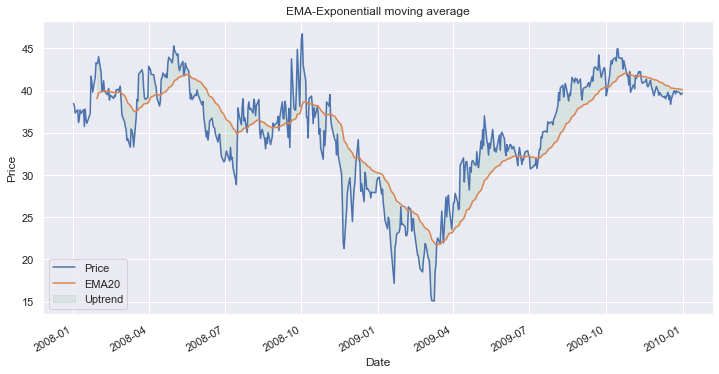

In [303]:
ax = data[column].plot(figsize=(12,6),label='Price')
data['ema' + str(period)].plot(label='EMA'+str(period), ax=ax)


ax.fill_between(data.index, data['ema20'] , data[column], color='green', alpha=0.08, label='Uptrend')

#ax.fill_between(data.index, data['ema20'] , data[column], color='red', alpha=0.08, label='Uptrend')


ax.set_title("EMA-Exponentiall moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc=0)

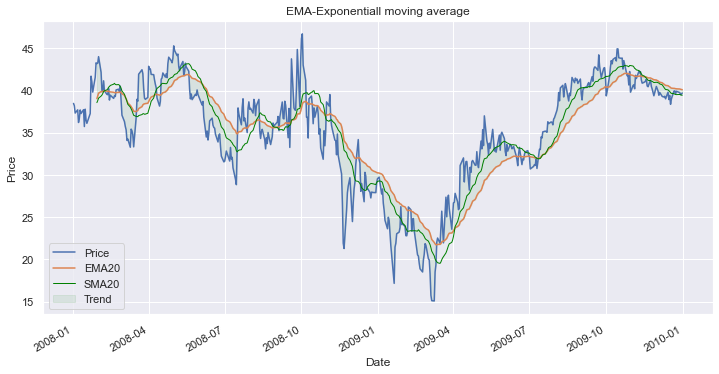

In [320]:
ax = data[column].plot(figsize=(12,6),label='Price')
data['ema' + str(period)].plot(label='EMA'+str(period), ax=ax)
data['RollingMean'].plot(label="SMA"+str(period), color='green', lw=1, ax=ax)

ax.fill_between(data.index, data['ema20'] , data[column], color='green', alpha=0.08, label='Trend')

ax.set_title("EMA-Exponentiall moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc=0)